In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
# Make the model - 5 layers with sigmoid activation
nLayers = [200, 100, 50, 25, 10]
X = tf.placeholder(tf.float32, [None, 28*28])
W1 = tf.Variable(tf.truncated_normal([28*28, nLayers[0]], stddev=0.1))
b1 = tf.Variable(tf.zeros([nLayers[0]]))

W2 = tf.Variable(tf.truncated_normal([nLayers[0], nLayers[1]], stddev=0.1))
b2 = tf.Variable(tf.zeros([nLayers[1]]))

W3 = tf.Variable(tf.truncated_normal([nLayers[1], nLayers[2]], stddev=0.1))
b3 = tf.Variable(tf.zeros([nLayers[2]]))

W4 = tf.Variable(tf.truncated_normal([nLayers[2], nLayers[3]], stddev=0.1))
b4 = tf.Variable(tf.zeros([nLayers[3]]))

W5 = tf.Variable(tf.truncated_normal([nLayers[3], nLayers[4]], stddev=0.1))
b5 = tf.Variable(tf.zeros([nLayers[4]]))

In [4]:
init = tf.global_variables_initializer()

In [5]:
# Model
pKeep = tf.placeholder(tf.float32)
Y1 = tf.nn.relu( tf.matmul(X, W1) + b1 )
Y1d= tf.nn.dropout(Y1, pKeep)
Y2 = tf.nn.relu( tf.matmul(Y1d, W2) + b2 )
Y2d= tf.nn.dropout(Y2, pKeep)
Y3 = tf.nn.relu( tf.matmul(Y2, W3) + b3 )
Y3d= tf.nn.dropout(Y3, pKeep)
Y4 = tf.nn.relu( tf.matmul(Y3, W4) + b4 )
Y4d= tf.nn.dropout(Y4, pKeep)
Y5 = tf.nn.softmax( tf.matmul(Y4d, W5) + b5 ) * (1-1e-8) + 1e-8
# Ground truth
Y_ = tf.placeholder(tf.float32, [None, 10])

In [6]:
# Loss
cost = -tf.reduce_sum(Y_ * tf.log(Y5))

In [7]:
# Nb of correct answers in batch
is_correct = tf.equal( tf.argmax(Y_, 1), tf.argmax(Y5, 1) )
accuracy = tf.reduce_mean( tf.cast(is_correct, tf.float32))

In [8]:
dec = 0.003 / np.exp( np.array(range(10000))/3000 )
dec[0]

0.0030000000000000001

In [9]:
# Training - set training method
decay = tf.placeholder(tf.float32)
optimizer = tf.train.GradientDescentOptimizer( decay )
# Training - make a step
train_step = optimizer.minimize(cost)

In [10]:
# Load data
import utils.RBrown_input_data as rbm
dt_path = '/Users/younes_zerouali/Documents/Stradigi/Databases/MNIST' 
mnist = rbm.read_data_sets(dt_path, one_hot=True)

Extracting /Users/younes_zerouali/Documents/Stradigi/Databases/MNIST/train-images-idx3-ubyte.gz
Extracting /Users/younes_zerouali/Documents/Stradigi/Databases/MNIST/train-labels-idx1-ubyte.gz
Extracting /Users/younes_zerouali/Documents/Stradigi/Databases/MNIST/t10k-images-idx3-ubyte.gz
Extracting /Users/younes_zerouali/Documents/Stradigi/Databases/MNIST/t10k-labels-idx1-ubyte.gz


In [11]:
sess = tf.Session()
sess.run(init)

In [13]:
# Loop and train/test
ACC = []
LOS = []
dec = 0.003 / np.exp( np.array(range(10000))/3000 )
for i,d in zip(range(10000), dec):
    # Get a batch
    batchX, batchY = mnist.train.next_batch(100)
    # TRAIN: make training dictionary
    trdict = {X:batchX, Y_:batchY, decay:d, pKeep:0.8}
    # TRAIN: update weigths
    sess.run(train_step, feed_dict=trdict)
    # TRAIN: accuracy
    a,c = sess.run([accuracy, cost], feed_dict=trdict)
    ACC.append(a)    
    LOS.append(c)
    # Log weights
    Ww5 = sess.run(decay)
    # TEST
    testX, testY = mnist.test.next_batch(100)
    tsdict = {X:testX, Y_:testY, pKeep:1}
    a,c = sess.run([accuracy, cost], feed_dict=tsdict)
    if i%99==0: print('Accuracy at iteration %i: %f' %(i, a)) 

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_3' with dtype float
	 [[Node: Placeholder_3 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_3', defined at:
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-4276c73ef6ea>", line 2, in <module>
    decay = tf.placeholder(tf.float32)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_3' with dtype float
	 [[Node: Placeholder_3 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


6.0964594

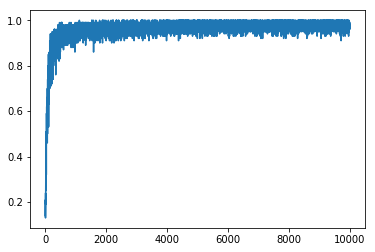

In [13]:
plt.plot( range(10000), ACC, label='accuracy')
#plt.plot( range(10000), LOS, label='loss')
plt.gca().x_label = 'Training iteration'
plt.gca().y_label = 'Classification accuracy'
LOS[7000]

In [17]:
np.mean(ACC)

1.0

In [18]:
ACC

[1.0]